# Homework Pandas

**Step 1:** 

- read titanic data from excel file
- print the number of rows and the number of columns
- display first 10 rows

In [11]:
# your code is here
import pandas as pd
import matplotlib.pyplot as plt
titanic = pd.ExcelFile("titanic.xls")
tableTitanic = titanic.parse(sheetname="titanic");
print('Number of rows:', len(tableTitanic))
print('Number of columns:', len(tableTitanic.columns))


Number of rows: 1309
Number of columns: 14


In [20]:
tableTitanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


**Step 2:** display statistics about "fare" and "cabin" columns

In [28]:
# your code is here
#statistics about "fare"
tableTitanic.describe()['fare']

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [107]:
#clean cabin column
cabin = tableTitanic[tableTitanic['cabin'].notnull()]['cabin']
cabin_frame = cabin.str.split('\s+')
cabin_1=cabin_frame.str[0]     
cabin_2=cabin_frame[cabin_frame.str[1].notnull()].str[1]
cabin_3=cabin_frame[cabin_frame.str[2].notnull()].str[2]
cabin_4=cabin_frame[cabin_frame.str[3].notnull()].str[3]
all_cabin = pd.concat([cabin_1,cabin_2,cabin_3,cabin_4])

In [120]:
#statistics about "cabin"
print(all_cabin.describe())
print("Percentages:\n",round(all_cabin.value_counts()/all_cabin.count()*100, 2))

count     356
unique    202
top         F
freq        8
Name: cabin, dtype: object
Percentages:
 F      2.25
C27    1.69
C23    1.69
C25    1.69
B66    1.40
       ... 
C47    0.28
B79    0.28
B80    0.28
D9     0.28
A11    0.28
Name: cabin, Length: 202, dtype: float64


**Step 3:** find the average fare for passengers with missing "cabin" value 

In [96]:
# your code is here
missing_cabin = pd.isnull(tableTitanic['cabin']) == True
tableTitanic[missing_cabin].groupby([missing_cabin])['fare'].mean()

cabin
True    19.132707
Name: fare, dtype: float64

**Step 4:** Compare the average fare for those who survived and not.

In [130]:
# your code is here
print(tableTitanic.groupby(['survived'])['fare'].mean())

survived
0    23.353831
1    49.361184
Name: fare, dtype: float64


**Step 5:** Build the following two histograms in one plot:
- fare for female passengers from the first class
- fare for male passengers from the first class

<AxesSubplot:ylabel='Frequency'>

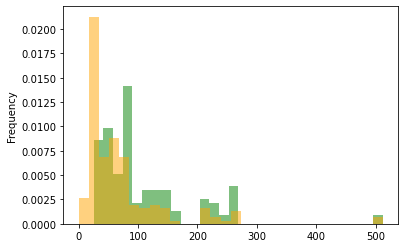

In [12]:
# your code is here
parameter_fem = (tableTitanic["pclass"] == 1)\
                & (tableTitanic["sex"] == 'female') 
parameter_male = (tableTitanic["pclass"] == 1)\
                & (tableTitanic["sex"] == 'male') 
tableTitanic["fare"][parameter_fem].plot(kind = 'hist', bins=30, alpha=0.5, color='Green', density=True)
tableTitanic["fare"][parameter_male].plot(kind = 'hist', bins=30, alpha=0.5, color='Orange', density=True)

In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/tobystaines/RoadAccidentsPODS/master/Cas_2016_Tidy.csv'
cas16 = pd.read_csv(url)
cas16.head(5)

,Unnamed: 0,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,0,2016010000005,2,1,Driver or rider,Male,23,5,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Motorcycle 50cc and under rider or passenger,Urban area,More deprived 30-40%
1,1,2016010000006,1,1,Driver or rider,Female,36,7,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%
2,2,2016010000008,1,1,Driver or rider,Male,24,5,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 20-30%
3,3,2016010000016,1,1,Passenger,Female,59,9,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Standing passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area,More deprived 30-40%
4,4,2016010000018,2,1,Driver or rider,Male,28,6,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,Urban area,Less deprived 40-50%


In [13]:
cas16.columns

Index(['Unnamed: 0', 'Accident_Index', 'Vehicle_Reference',
       'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty',
       'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity',
       'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger',
       'Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker',
       'Casualty_Type', 'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')

In [15]:
#Add casualty numbers to main table
fatalities = pd.get_dummies(cas16['Casualty_Severity'])
fatalities = fatalities[['Fatal','Serious']]
fatalities

,Fatal,Serious
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
181379,0,0
181380,0,0
181381,0,0
181382,0,0


In [16]:
url = 'https://raw.githubusercontent.com/tobystaines/RoadAccidentsPODS/master/Cas_2016_Tidy.csv'
acc16 = pd.read_csv(url)
acc16.head(5)



,Unnamed: 0,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,0,2016010000005,2,1,Driver or rider,Male,23,5,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Motorcycle 50cc and under rider or passenger,Urban area,More deprived 30-40%
1,1,2016010000006,1,1,Driver or rider,Female,36,7,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%
2,2,2016010000008,1,1,Driver or rider,Male,24,5,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 20-30%
3,3,2016010000016,1,1,Passenger,Female,59,9,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Standing passenger,No / Not applicable,Bus or coach occupant (17 or more pass seats),Urban area,More deprived 30-40%
4,4,2016010000018,2,1,Driver or rider,Male,28,6,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Cyclist,Urban area,Less deprived 40-50%


In [18]:
import plotly
